In [1]:
pip install azure-ai-textanalytics==5.1.0

  Using cached azure_ai_textanalytics-5.1.0-py2.py3-none-any.whl (153 kB)
  Using cached azure_core-1.22.1-py3-none-any.whl (178 kB)
  Using cached azure_common-1.1.28-py2.py3-none-any.whl (14 kB)
  Using cached msrest-0.6.21-py2.py3-none-any.whl (85 kB)
  Using cached isodate-0.6.1-py2.py3-none-any.whl (41 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
key = "ed2d69aba7d048a1b538c72866efb610"
endpoint = "https://learnmoduleworkshop.cognitiveservices.azure.com/"

In [3]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.textanalytics import TextAnalyticsClient

In [5]:
# Authenticate the client using your key and endpoint 
def authenticate_client():
    ta_credential = AzureKeyCredential(key)
    text_analytics_client = TextAnalyticsClient(
            endpoint=endpoint, 
            credential=ta_credential)
    return text_analytics_client

client = authenticate_client()

In [6]:
# Example method for detecting the language of text
def language_detection_example(client):
    try:
        documents = ["Ce document est rédigé en Français."]
        response = client.detect_language(documents = documents, country_hint = 'us')[0]
        print("Language: ", response.primary_language.name)

    except Exception as err:
        print("Encountered exception. {}".format(err))
language_detection_example(client)

Language:  French


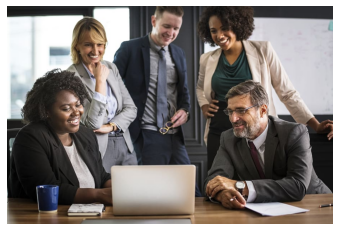

{'categories': [{'name': 'people_group', 'score': 0.7265625, 'detail': {'celebrities': [{'name': 'Ukinebo Dare', 'confidence': 0.7885736227035522, 'faceRectangle': {'left': 150, 'top': 262, 'width': 74, 'height': 74}}]}}], 'description': {'tags': ['person', 'indoor', 'people', 'group', 'conference room', 'crowd'], 'captions': [{'text': 'Ukinebo Dare et al. having a discussion', 'confidence': 0.5275330543518066}]}, 'faces': [{'age': 56, 'gender': 'Male', 'faceRectangle': {'left': 598, 'top': 271, 'width': 83, 'height': 83}}, {'age': 34, 'gender': 'Female', 'faceRectangle': {'left': 150, 'top': 262, 'width': 74, 'height': 74}}, {'age': 26, 'gender': 'Female', 'faceRectangle': {'left': 560, 'top': 48, 'width': 71, 'height': 71}}, {'age': 33, 'gender': 'Female', 'faceRectangle': {'left': 208, 'top': 90, 'width': 70, 'height': 70}}, {'age': 34, 'gender': 'Male', 'faceRectangle': {'left': 427, 'top': 45, 'width': 57, 'height': 57}}], 'objects': [{'rectangle': {'x': 81, 'y': 496, 'w': 72, 'h'

In [8]:
import requests
import matplotlib.pyplot as plt
import json
from PIL import Image
from io import BytesIO

subscription_key = "1ec2b92efb2d4625ad0c7c7fc9eaff69"
analyze_url = "https://learn-tvlive.cognitiveservices.azure.com//vision/v3.1/analyze"
image_url = "https://c0.wallpaperflare.com/preview/545/533/193/analyzing-people-brainstorming-business-business-people.jpg"
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'visualFeatures': 'Categories,Description,Faces,Objects'}
data = {'url': image_url}

try:
    response = requests.post(analyze_url, headers=headers,params=params, json=data)
    response.raise_for_status()
    analysis = response.json()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

# Display the image
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
plt.show()
print(analysis)